***Importing necessary tools***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression  
from sklearn.svm import SVC
from xgboost import XGBClassifier  

In [2]:
df = pd.read_csv('alzheimers_disease_data.csv')

In [3]:
pd.set_option('display.max_columns', None)              
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [4]:
df = df.drop(columns=['PatientID','DoctorInCharge'],axis=1)

In [5]:
df.isnull().sum() 

Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosi

Age: ranges from 60 to 90 years.
Gender: 0 represents Male and 1 represents Female.
Ethnicity: 
0: Caucasian
1: African American
2: Asian
3: Other
EducationLevel: 
0: None
1: High School
2: Bachelor's
3: Higher


***Visualization***

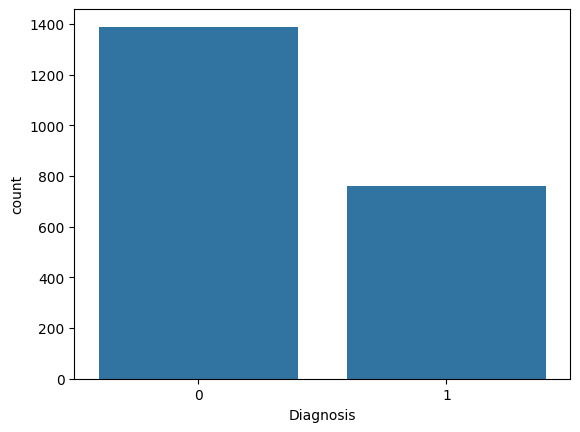

In [6]:
sns.countplot(x='Diagnosis',data=df) #quite mid balace dataset
plt.show()

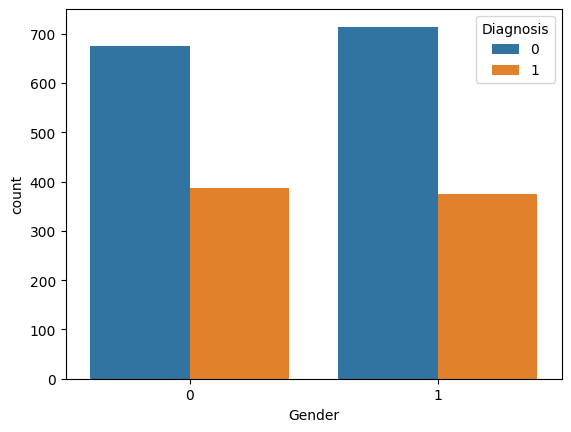

In [7]:
sns.countplot(x='Gender',hue='Diagnosis',data=df)
plt.show()

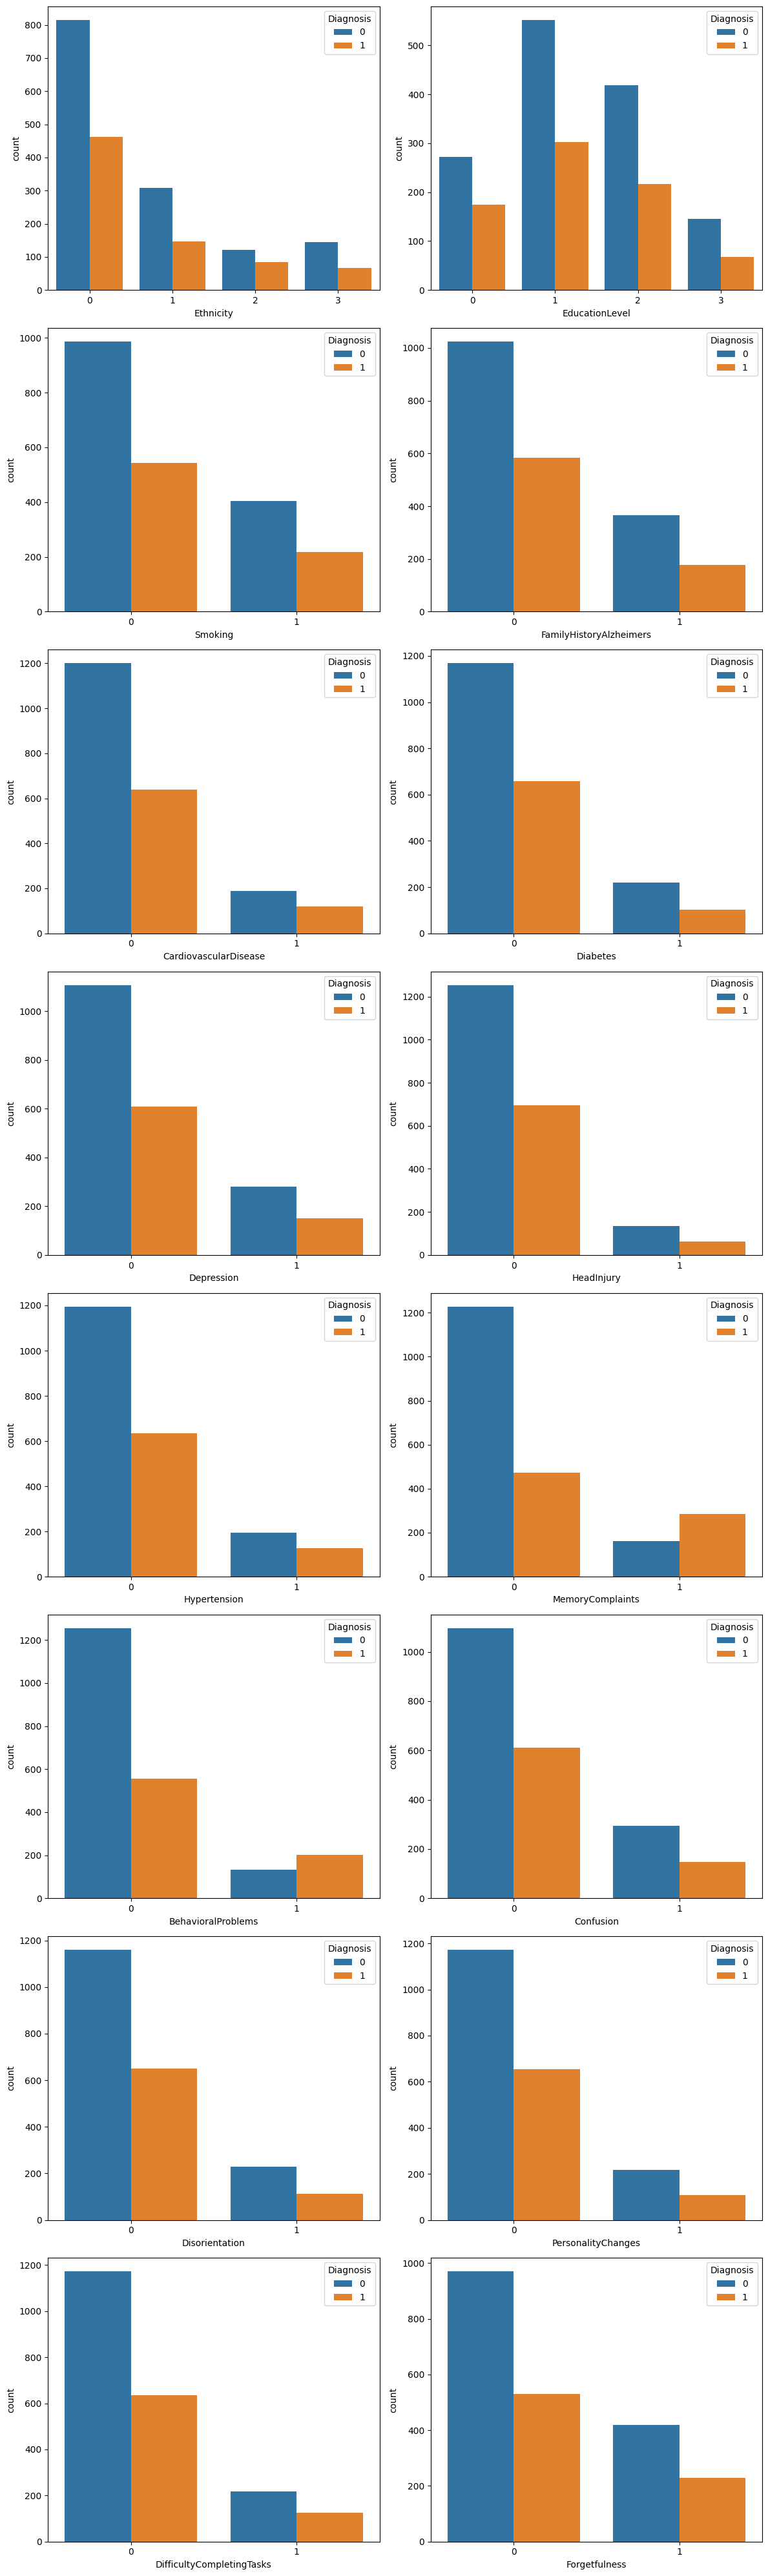

In [8]:
columns_to_plot = [
    'Ethnicity', 'EducationLevel', 'Smoking', 'FamilyHistoryAlzheimers',
    'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury',
    'Hypertension', 'MemoryComplaints', 'BehavioralProblems', 'Confusion',
    'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness'
]

# Create subplots with 8 rows and 2 columns
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(12, 40))

# Loop through the columns and create count plots
for i, column in enumerate(columns_to_plot):
    # First column: count plot with hue for Diagnosis
    sns.countplot(x=column, hue='Diagnosis', data=df, ax=axes[i // 2, i % 2])

plt.tight_layout()  # Adjusts layout to prevent overlap
plt.show()

Learning 
Male suffers more in the disease than female
Caucasian suffer more and they are least sufferer in the dataset because of imbalace data 
Memory Complaints and behaivouralProblem are seen more in the disease


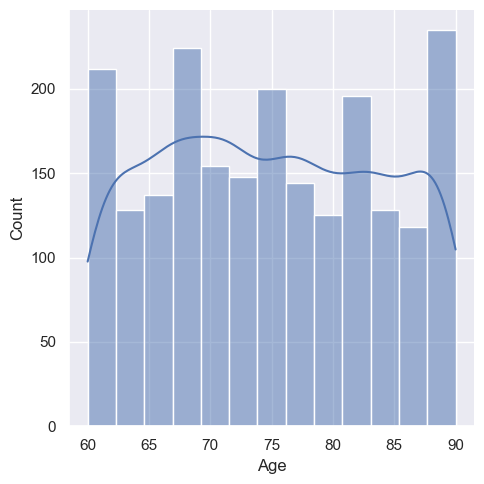

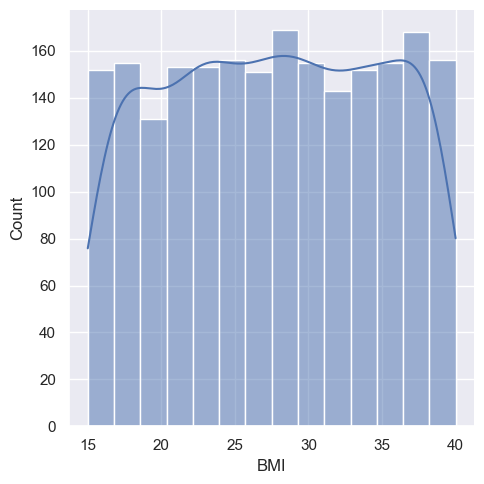

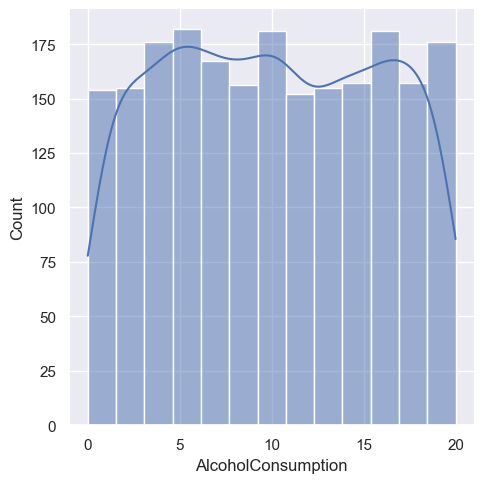

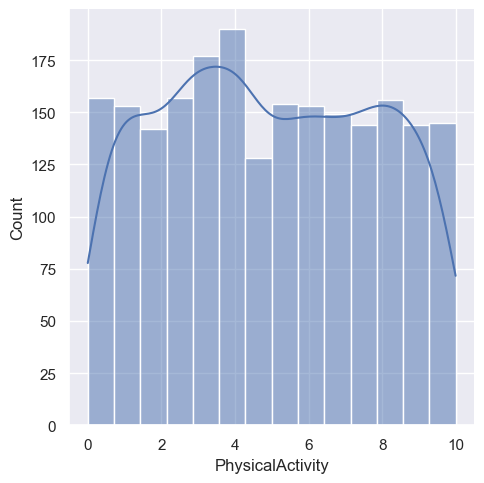

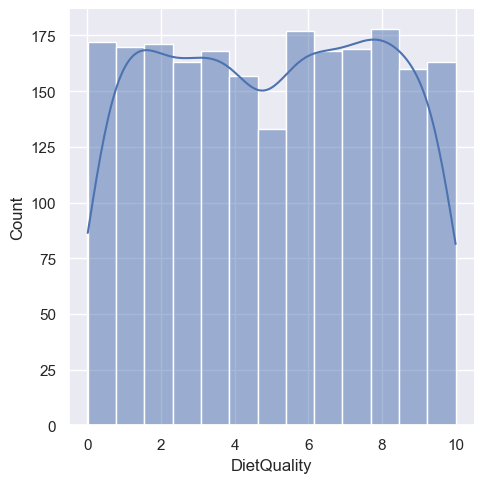

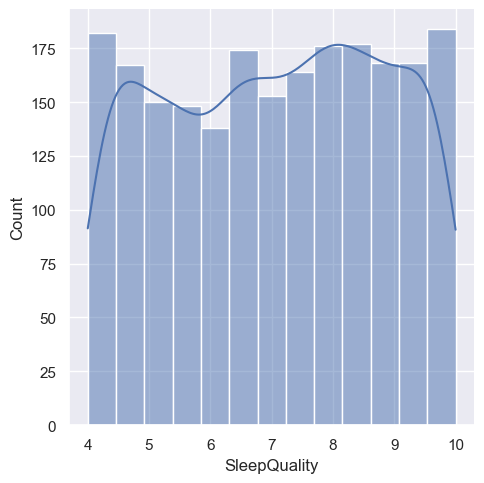

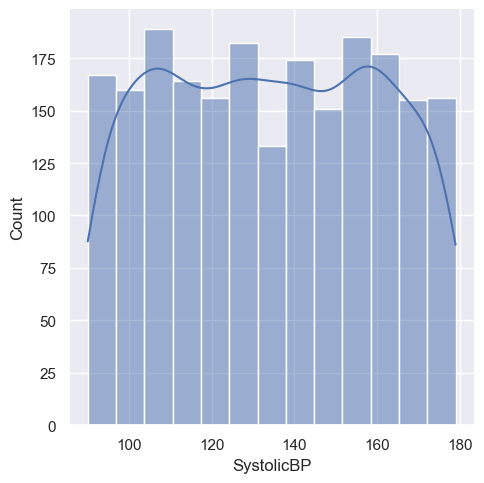

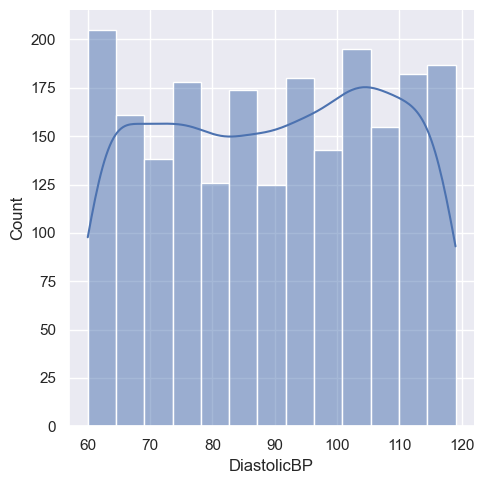

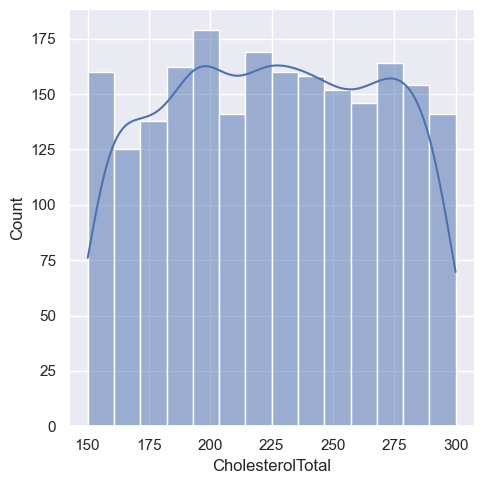

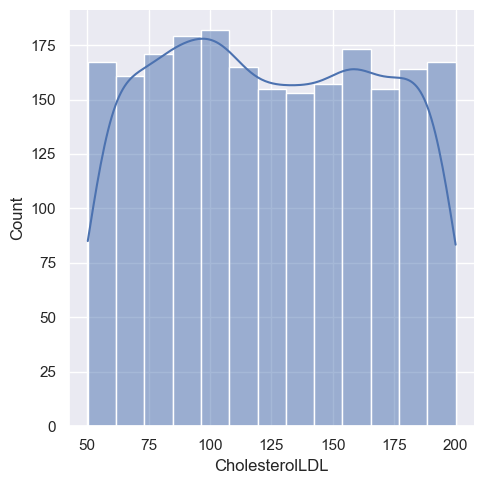

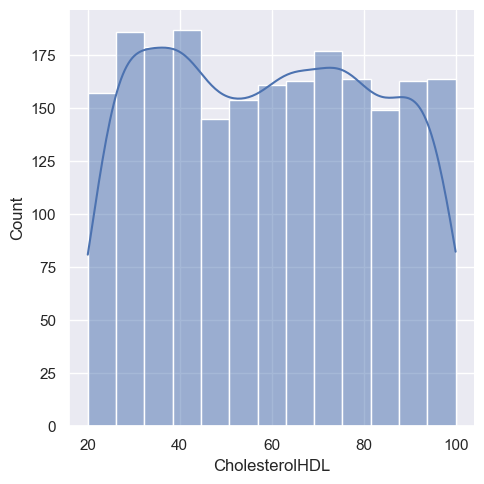

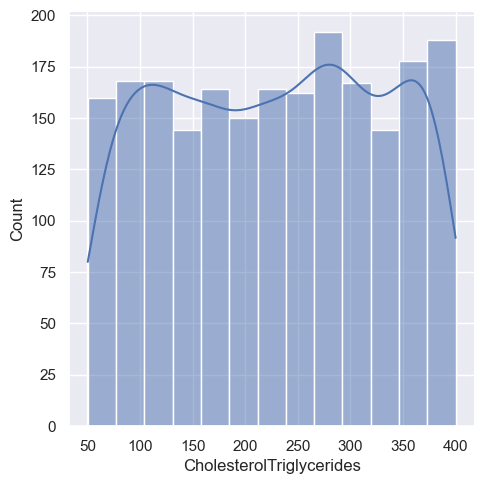

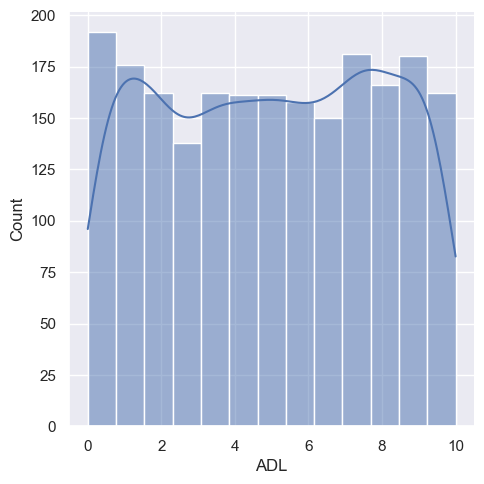

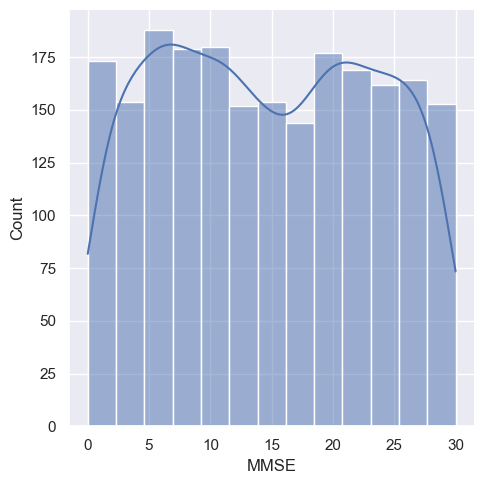

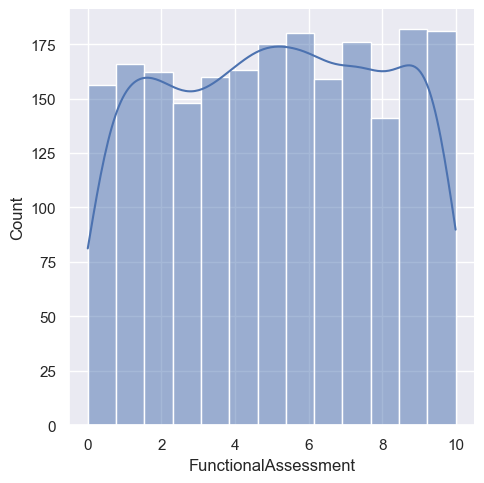

In [9]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
sns.set()

columns_to_plot = [
    'Age', 'BMI', 'AlcoholConsumption',	'PhysicalActivity',	'DietQuality','SleepQuality',
    'SystolicBP','DiastolicBP',	'CholesterolTotal',	'CholesterolLDL','CholesterolHDL','CholesterolTriglycerides','ADL','MMSE','FunctionalAssessment'
]

for i, column in enumerate(columns_to_plot):
    # First column: count plot with hue for Diagnosis
    sns.displot(df[column],kde=True)

plt.tight_layout()  # Adjusts layout to prevent overlap
plt.show()

In [10]:
X=df.drop('Diagnosis',axis=1)
y=df['Diagnosis']

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
scaler.fit_transform(X)

array([[-0.21236841, -1.01264391, -0.70040826, ..., -0.42134813,
         2.30261868, -0.65704809],
       [ 1.56775727, -1.01264391, -0.70040826, ..., -0.42134813,
        -0.43428815,  1.52195861],
       [-0.21236841, -1.01264391,  2.31195467, ..., -0.42134813,
         2.30261868, -0.65704809],
       ...,
       [ 0.23266301, -1.01264391, -0.70040826, ..., -0.42134813,
        -0.43428815, -0.65704809],
       [ 0.34392086,  0.98751396,  2.31195467, ..., -0.42134813,
        -0.43428815,  1.52195861],
       [-0.32362627, -1.01264391, -0.70040826, ..., -0.42134813,
        -0.43428815,  1.52195861]])

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

***XGBClassifier***

In [15]:
xgb = XGBClassifier ()

In [16]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [17]:
xgb.score(X_test,y_test)

0.9418604651162791

***GaussianNB***

In [18]:
nb = GaussianNB()

In [19]:
nb.fit(X_train,y_train)

GaussianNB()

In [20]:
nb.score(X_test,y_test)

0.7651162790697674

***LogisticRegression***

In [21]:
reg = LogisticRegression()

In [22]:
reg.fit(X_train,y_train)

LogisticRegression()

In [23]:
reg.score(X_test,y_test)

0.7767441860465116

***DecisionTreeClassifier***

In [24]:
dtclf = DecisionTreeClassifier()

In [25]:
dtclf.fit(X_train,y_train)

DecisionTreeClassifier()

In [26]:
dtclf.score(X_test,y_test)

0.8813953488372093

***SVC***

In [27]:
model = SVC()

In [28]:
model.fit(X_train,y_train)

SVC()

In [29]:
model.score(X_test,y_test)

0.6441860465116279

***RandomForest***

In [30]:
rclf=RandomForestClassifier(n_estimators=60)

In [31]:
from sklearn.model_selection import KFold,cross_val_score

In [32]:
kf=KFold(n_splits=10,shuffle=True,random_state=1)

In [33]:
score = cross_val_score(rclf, X_train, y_train, cv=kf, scoring='accuracy')

In [34]:
score

array([0.91860465, 0.96511628, 0.94186047, 0.95348837, 0.93023256,
       0.93023256, 0.9244186 , 0.9127907 , 0.93604651, 0.94152047])

***Inputting_Part***

In [35]:
from sklearn.pipeline import Pipeline

In [36]:
x_pred={'Age':0,'Gender':0,'Ethnicity':0,'EducationLevel':0,'BMI':0,'Smoking':0,
        'AlcoholConsumption':0,'PhysicalActivity':0,'DietQuality':0,
        'SleepQuality':0,'FamilyHistoryAlzheimers':0,'CardiovascularDisease':0,'Diabetes':0,
       'Depression':0,'HeadInjury':0,'Hypertension':0,'SystolicBP':0,
        'DiastolicBP':0,'CholesterolTotal':0,'CholesterolLDL':0,
        'CholesterolHDL':0,'CholesterolTriglycerides':0,'MMSE':0,
        'FunctionalAssessment':0,'MemoryComplaints':0,'BehavioralProblems':0,
       'ADL':0,'Confusion':0,'Disorientation':0,'PersonalityChanges':0,
       'DifficultyCompletingTasks':0,'Forgetfulness':0}
for i in x_pred:
    print('Enter the ',i,' of the patient:')
    value=float(input())
    x_pred[i]=value

Enter the  Age  of the patient:


 41


Enter the  Gender  of the patient:


 1


Enter the  Ethnicity  of the patient:


 3


Enter the  EducationLevel  of the patient:


 2


Enter the  BMI  of the patient:


 25.5


Enter the  Smoking  of the patient:


 1


Enter the  AlcoholConsumption  of the patient:


 100


Enter the  PhysicalActivity  of the patient:


 100


Enter the  DietQuality  of the patient:


 125


Enter the  SleepQuality  of the patient:


 110


Enter the  FamilyHistoryAlzheimers  of the patient:


 1


Enter the  CardiovascularDisease  of the patient:


 1


Enter the  Diabetes  of the patient:


 1


Enter the  Depression  of the patient:


 1


Enter the  HeadInjury  of the patient:


 1


Enter the  Hypertension  of the patient:


 1


Enter the  SystolicBP  of the patient:


 1


Enter the  DiastolicBP  of the patient:


 75


Enter the  CholesterolTotal  of the patient:


 150


Enter the  CholesterolLDL  of the patient:


 150


Enter the  CholesterolHDL  of the patient:


 150


Enter the  CholesterolTriglycerides  of the patient:


 150


Enter the  MMSE  of the patient:


 150


Enter the  FunctionalAssessment  of the patient:


 150


Enter the  MemoryComplaints  of the patient:


 0


Enter the  BehavioralProblems  of the patient:


 1


Enter the  ADL  of the patient:


 0


Enter the  Confusion  of the patient:


 1


Enter the  Disorientation  of the patient:


 1


Enter the  PersonalityChanges  of the patient:


 1


Enter the  DifficultyCompletingTasks  of the patient:


 1


Enter the  Forgetfulness  of the patient:


 1


In [37]:
x_pred=pd.DataFrame(x_pred,index=[0]) # use user input to bulid a x_pred and use that for prediction
x_pred

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness
0,41.0,1.0,3.0,2.0,25.5,1.0,100.0,100.0,125.0,110.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,75.0,150.0,150.0,150.0,150.0,150.0,150.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [40]:
xgb.predict(x_pred)

array([0])